In [13]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [14]:
# podatki uporabljeni iz datoteke nova_sporocila_na_letnik
data = np.array([
    [0, 99215],
    [1, 50427],
    [2, 54193],
    [3, 4114],
])

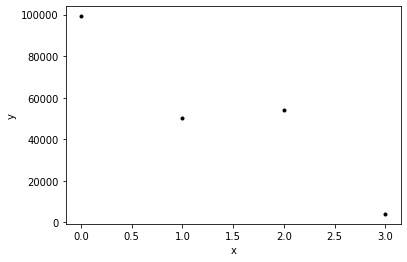

In [15]:
x = data[:, [0]]
y = data[:, [1]]

plt.figure()
plt.plot(x, y, "k.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [16]:
def plot_fit_residual(x, y, yp):

    # Model
    fig, axes  = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    axes[0].plot(x.ravel(), y.ravel(), "k.",  label="Podatki")
    axes[0].plot(x.ravel(), yp.ravel(), "g-", label="Model h(x)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].legend(loc=4)

    # Ostanki
    r = pearsonr(y.ravel(), y.ravel()-yp.ravel())[0]
    axes[1].plot(y.ravel(), y.ravel()-yp.ravel(), "k.", label="Ostanek")
    axes[1].set_xlabel("y")
    axes[1].set_ylabel("y-h(x)")
    axes[1].set_title("Graf ostankov, R=%.3f" % r)
    axes[1].legend(loc=4)
    plt.show()

[94217.8] [[-28153.7]]


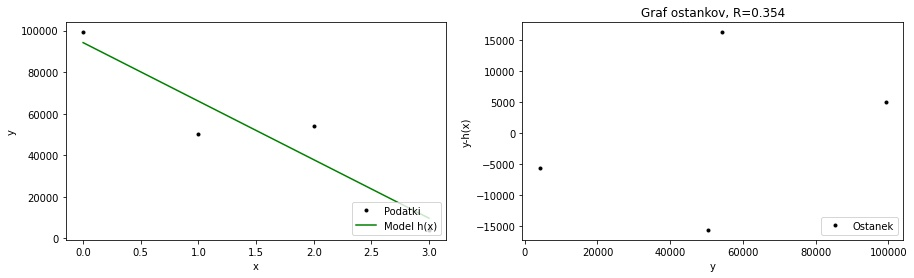

In [23]:
# Ucenje modela
model = LinearRegression()
model.fit(x, y)

print(model.intercept_,model.coef_)


# Napoved vrednosti za podatke
hx = model.predict(x)

plot_fit_residual(x, y, hx)

In [28]:
mean_squared_error(hx, y)

141613507.57500002

Glede na to, da imamo malo podatkov se na ta model ne moremo preveč zanašati. Iz trenda le-teh pa lahko jasno razberemo drastičen vpad brucev na Discord strežniku.